### 共轭

In [77]:
norm(x) = sqrt(x'*x)
function ConjugateGradientFSO(f, g, h, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        debug=false)
    #check arguments
    n, m=size(h)
    if n≠m
        error("ERROR: Matrix H is not square!")
    end
    maxIterations = n
    xk = x0
    fk = f(xk...)
    gk = g(xk...)
    rk = -gk
    dk = rk
    dh = dk'*h*dk
    α =  dk'*rk/dh
    δ =  α .*dk
    xn = xk .+ δ
    fn = f(xn...)
    gn = g(xn...)
    rn = -gn
    βn = dk'*h*rn/dh
    dn = rn .- βn.*dk
    xpoints=[]
    for i in 1:maxIterations+2
        # iteration
        # convegence?
        #if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(gn)<=ϵg)
        xpoints=push!(xpoints,xk)

        if (norm(gn)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return xn, fn, gn, δ, xpoints
        else
            xk = xn
            fk = fn
            dk = dn
        end
        fn = f(xn...)
        gn = g(xn...)
        rn = -gn
        βn = dk'*h*rn/dh
        dn = rn .- βn.*dk
        dh = dn'*h*dn
        α  = dn'*rn/dh
        δ  = α.*dn
        xn = xk .+ δ
        if debug
            println("i=",i," x=", xn, " α=", α, " β=", βn, " gn=", gn, " d=", dn, " δ= ",δ,"   ",xpoints)
        end
    end
    #println("WARN:", maxIterations, " iterations have been exceeded!")
end

ConjugateGradientFSO (generic function with 1 method)

In [78]:
i,xn,d,δ,xpoints=
ConjugateGradientFSO(
    (x,y)->0.5*(2x^2+6*x*y+25y^2)-(x+21*y),
    (x,y)->[2x+3y-1, 3x+25y-21],
    [2 3; 3 25],
    [7.,8.],
    debug=false
)

Convergence is reached after 4 iterations.


([-0.926829, 0.95122], -9.524390243902442, [-6.66134e-16, 0.0], [3.81595e-16, -7.05987e-17], Any[[7.0, 8.0], [5.53825, 0.0986537], [-0.606994, 1.23558], [-0.926829, 0.95122]])

In [79]:
xpoints

4-element Array{Any,1}:
 [7.0, 8.0]          
 [5.53825, 0.0986537]
 [-0.606994, 1.23558]
 [-0.926829, 0.95122]

In [29]:
using Gadfly

In [80]:
data=xpoints
layer1=layer(
    x=[data[i][1] for i in 1:length(data)],
    y=[data[i][2] for i in 1:length(data)],
    Geom.point,Geom.line,Theme(default_color="black")
)

2-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:y=>[8.0, 0.0986537, 1.23558, 0.95122],:x=>[7.0, 5.53825, -0.606994, -0.926829]), Gadfly.StatisticElement[], Gadfly.Geom.PointGeometry(Symbol("")), Theme(RGB{N0f8}(0.0,0.0,0.0), 0.9mm, 0.45mm, 1.8mm, Function[circle, square, diamond, cross, xcross, utriangle, dtriangle, star1, star2, hexagon, octagon, hline, vline], 0.3mm, Symbol[:solid, :dash, :dot, :dashdot, :dashdotdot, :ldash, :ldashdash, :ldashdot, :ldashdashdot], nothing, nothing, 0.0, nothing, Measures.Length{:mm,Float64}[5.0mm], RGB{N0f8}(0.816,0.816,0.878), Measures.Length{:mm,Float64}[0.5mm, 0.5mm], RGB{N0f8}(0.627,0.627,0.627), 0.2mm, "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.424,0.376,0.42), "'PT Sans','Helvetica Neue','Helvetica',sans-serif", 3.880555555555555mm, RGB{N0f8}(0.337,0.29,0.333), "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.298,0.251,0.294), "'PT Sans','

### Newton

In [84]:
function Newton(f,g,h,x0;
        ϵx=0.01,  #precision for step size
        ϵf=0.01,  #precision for objective function
        ϵg=0.01,  #precision for gradient
        maxIterations=128,
        debug=true
    )
    
    xk=x0
    fk=f(xk...)
    
    xpoints=[]

    for i in 1:maxIterations
        # iteration
        xpoints=push!(xpoints,xk)

        d=-inv(h(xk...))*g(xk...)  ###xk...表示将矩阵和参数一一对应
        α=1
        δ=α*d
        xn=xk.+δ  #X(k+1)=X(k)+αd
        fn=f(xn...)
        # converagence?
        if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
            println("Converagence is reached after ",i," iterations")
            return (xk,fk,d,δ,xpoints)
        end
        if debug
            println("i=",i,"α=",α,"xk=",xk,"xn=",xn,"d=",d,"δ=",δ,"   ",xpoints)
            println("fk=",fk,"fn=",fn)
        end
        xk=xn
        fk=fn
    end
    println("Warn:",maxIterations,"have been exceeded!")
end

Newton (generic function with 1 method)

In [85]:
i,xk,d,δ,xpoints=
Newton(
    (x,y)->0.5*(2x^2+6*x*y+25y^2)-(x+21*y),
    (x,y)->[2x+3y-1, 3x+25y-21],
    (x,y)->[2 3; 
            3 25],  
    
    [7.,8.],
    maxIterations=10000000,
    debug=true
)

i=1α=1xk=[7.0, 8.0]xn=[-0.926829, 0.95122]d=[-7.92683, -7.04878]δ=[-7.92683, -7.04878]   Any[[7.0, 8.0]]
fk=842.0fn=-9.52439024390244
Converagence is reached after 2 iterations


([-0.926829, 0.95122], -9.52439024390244, [-4.3759e-15, -4.33258e-17], [-4.3759e-15, -4.33258e-17], Any[[7.0, 8.0], [-0.926829, 0.95122]])

In [86]:
xpoints

2-element Array{Any,1}:
 [7.0, 8.0]          
 [-0.926829, 0.95122]

In [87]:
data=xpoints
data1=convert(Array{Float64,1},[data[i][1] for i in 1:length(data)])
data2=convert(Array{Float64,1},[data[i][2] for i in 1:length(data)])
layer2=layer(
    x=data1,
    y=data2,
    Geom.point,Geom.line,Theme(default_color="green")
)

2-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:y=>[8.0, 0.95122],:x=>[7.0, -0.926829]), Gadfly.StatisticElement[], Gadfly.Geom.PointGeometry(Symbol("")), Theme(RGB{N0f8}(0.0,0.502,0.0), 0.9mm, 0.45mm, 1.8mm, Function[circle, square, diamond, cross, xcross, utriangle, dtriangle, star1, star2, hexagon, octagon, hline, vline], 0.3mm, Symbol[:solid, :dash, :dot, :dashdot, :dashdotdot, :ldash, :ldashdash, :ldashdot, :ldashdashdot], nothing, nothing, 0.0, nothing, Measures.Length{:mm,Float64}[5.0mm], RGB{N0f8}(0.816,0.816,0.878), Measures.Length{:mm,Float64}[0.5mm, 0.5mm], RGB{N0f8}(0.627,0.627,0.627), 0.2mm, "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.424,0.376,0.42), "'PT Sans','Helvetica Neue','Helvetica',sans-serif", 3.880555555555555mm, RGB{N0f8}(0.337,0.29,0.333), "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.298,0.251,0.294), "'PT Sans','Helvetica Neue','Helvetica',sans-serif

### steepest methods

In [70]:
function steepest_descent(f,g,x0;
        ϵx=0.01,ϵf=0.001,ϵg=0.001,maxIter=1000000,debug=false)
    
    xk=x0
    fk=f(xk...)
    xpoints=[]
    for i in 1:maxIter
        
        d=-g(xk...)
        α=search_for_α(f,xk,fk,d,-d)
        δ = α*d
        xn=xk.+δ
        fn=f(xn...)
        xpoints=push!(xpoints,xk)

       if (norm(δ)<=ϵx)&&((abs(fn-fk))<=ϵf)&&((norm(d)<=ϵg))
            println("conver",i,"α=",α)
            return (xk,fk,d,δ,xpoints)
        end
        if debug
            println("i=",i,"α=",α,"xk=",xk,"fk=",fk,"d=",d,"   ",xpoints)
        end
        xk=xn
        fk=fn
    end
    println("WANING:",maxIter,"out of the maxIter")
end


steepest_descent (generic function with 1 method)

In [71]:
function search_for_α(f,xk,fk,d,g;
    a0=100,ϵ=0.5,τ=0.5)
    α=a0
    ϕ0=d'*g
    while f((xk.+α*d)...)>fk+ϵ* α*ϕ0
        α=τ*α
    end
    return α
end


search_for_α (generic function with 1 method)

In [72]:
i,xk,d,δ,xpoints=
steepest_descent(
    (x,y)->0.5*(2x^2+6*x*y+25y^2)-(x+21*y),
    (x,y)->[2x+3y-1, 3x+25y-21],
    [7,8]
    )

conver49α=0.1953125


([-0.926352, 0.951148], -9.52439005474084, [-0.00073878, 0.000361937], [-0.000144293, 7.06908e-5], Any[[7, 8], [6.09668, 3.11719], [5.59509, 1.28077], [5.2525, 0.601948], [4.70022, 0.123129], [2.98736, 0.869442], [2.6171, 0.3959], [2.08761, 0.713401], [1.82807, 0.562138], [0.13176, 1.13336]  …  [-0.924141, 0.95102], [-0.924375, 0.95087], [-0.925129, 0.951139], [-0.925283, 0.950988], [-0.925751, 0.951212], [-0.925856, 0.951063], [-0.926, 0.951159], [-0.926072, 0.951111], [-0.926304, 0.951196], [-0.926352, 0.951148]])

In [73]:
xpoints

49-element Array{Any,1}:
 [7, 8]                
 [6.09668, 3.11719]    
 [5.59509, 1.28077]    
 [5.2525, 0.601948]    
 [4.70022, 0.123129]   
 [2.98736, 0.869442]   
 [2.6171, 0.3959]      
 [2.08761, 0.713401]   
 [1.82807, 0.562138]   
 [0.13176, 1.13336]    
 [0.0667305, 0.944658] 
 [-0.0293357, 0.807127]
 [-0.162413, 0.895978] 
 ⋮                     
 [-0.923337, 0.951183] 
 [-0.923672, 0.950716] 
 [-0.924141, 0.95102]  
 [-0.924375, 0.95087]  
 [-0.925129, 0.951139] 
 [-0.925283, 0.950988] 
 [-0.925751, 0.951212] 
 [-0.925856, 0.951063] 
 [-0.926, 0.951159]    
 [-0.926072, 0.951111] 
 [-0.926304, 0.951196] 
 [-0.926352, 0.951148] 

In [74]:
data=xpoints
data1=convert(Array{Float64,1},[data[i][1] for i in 1:length(data)])
data2=convert(Array{Float64,1},[data[i][2] for i in 1:length(data)])

49-element Array{Float64,1}:
 8.0                
 3.1171875          
 1.2807683944702148 
 0.6019477425143123 
 0.12312904091959354
 0.8694422528696606 
 0.39590026798409417
 0.7134010474093322 
 0.56213801662197   
 1.1333631648618963 
 0.9446581039379451 
 0.8071266499425381 
 0.8959782819557127 
 ⋮                  
 0.9511826713918673 
 0.950716042136577  
 0.9510203562289301 
 0.9508697479636108 
 0.9511394094477442 
 0.9509880741504935 
 0.9512121108855544 
 0.9510632529120981 
 0.9511594805548477 
 0.951111280956578  
 0.9511961328922349 
 0.9511477996457862 

In [75]:
layer3=layer(
    x=data1,
    y=data2,
    Geom.point,Geom.line,Theme(default_color="grey")
)

2-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:y=>[8.0, 3.11719, 1.28077, 0.601948, 0.123129, 0.869442, 0.3959, 0.713401, 0.562138, 1.13336  …  0.95102, 0.95087, 0.951139, 0.950988, 0.951212, 0.951063, 0.951159, 0.951111, 0.951196, 0.951148],:x=>[7.0, 6.09668, 5.59509, 5.2525, 4.70022, 2.98736, 2.6171, 2.08761, 1.82807, 0.13176  …  -0.924141, -0.924375, -0.925129, -0.925283, -0.925751, -0.925856, -0.926, -0.926072, -0.926304, -0.926352]), Gadfly.StatisticElement[], Gadfly.Geom.PointGeometry(Symbol("")), Theme(RGB{N0f8}(0.502,0.502,0.502), 0.9mm, 0.45mm, 1.8mm, Function[circle, square, diamond, cross, xcross, utriangle, dtriangle, star1, star2, hexagon, octagon, hline, vline], 0.3mm, Symbol[:solid, :dash, :dot, :dashdot, :dashdotdot, :ldash, :ldashdash, :ldashdot, :ldashdashdot], nothing, nothing, 0.0, nothing, Measures.Length{:mm,Float64}[5.0mm], RGB{N0f8}(0.816,0.816,0.878), Measures.Length{:mm,Float64}[0.5mm, 0.5mm], RGB{N0f8}(0.627,0.627,0.627), 0.2mm, "'PT Sans Caption

In [81]:
fitfunc=(x,y)->0.5*(2x^2+6*x*y+25y^2)-(x+21*y)
layer4=layer((x,y)->fitfunc(x,y),-1,10,-1,10)

1-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:xmin=>[-1],:xmax=>[10],:ymin=>[-1],:ymax=>[10],:z=>##164#165()), Gadfly.StatisticElement[], Gadfly.Geom.LineGeometry(Gadfly.Stat.ContourStatistic(15, 150), true, 2, Symbol("")), nothing, 0)

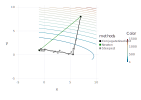

In [88]:
plot(layer1,layer2,layer3,layer4,
    Guide.manual_color_key("methods",["ConjugateGradient","Newton","Steepest"],["black","green","grey"]))